# Install Dependencies

In [1]:
%%capture
!pip install nibabel

In [2]:
import matplotlib.pyplot as plt
import nibabel as nib
from matplotlib.colors import from_levels_and_colors
import os
from matplotlib.widgets import Slider
from ipywidgets import widgets

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path_img = '/content/drive/MyDrive/Machine-Learning-Biomedicine/PankVision-3D/dataset/dataset-007/nifti_files/images'
path_lab = '/content/drive/MyDrive/Machine-Learning-Biomedicine/PankVision-3D/dataset/dataset-007/nifti_files/labels'

In [5]:
!ls /content/drive/MyDrive/Machine-Learning-Biomedicine/PankVision-3D/dataset/dataset-007/nifti_files/images

pancreas_001_0.nii.gz  pancreas_175_0.nii.gz  pancreas_305_0.nii.gz
pancreas_004_0.nii.gz  pancreas_178_0.nii.gz  pancreas_308_0.nii.gz
pancreas_005_0.nii.gz  pancreas_179_0.nii.gz  pancreas_309_0.nii.gz
pancreas_006_0.nii.gz  pancreas_180_0.nii.gz  pancreas_310_0.nii.gz
pancreas_010_0.nii.gz  pancreas_181_0.nii.gz  pancreas_311_0.nii.gz
pancreas_010_1.nii.gz  pancreas_182_0.nii.gz  pancreas_312_0.nii.gz
pancreas_012_0.nii.gz  pancreas_183_0.nii.gz  pancreas_313_0.nii.gz
pancreas_015_0.nii.gz  pancreas_187_0.nii.gz  pancreas_315_0.nii.gz
pancreas_016_0.nii.gz  pancreas_193_0.nii.gz  pancreas_316_0.nii.gz
pancreas_018_0.nii.gz  pancreas_194_0.nii.gz  pancreas_318_0.nii.gz
pancreas_019_0.nii.gz  pancreas_196_0.nii.gz  pancreas_320_0.nii.gz
pancreas_021_0.nii.gz  pancreas_197_0.nii.gz  pancreas_321_0.nii.gz
pancreas_024_0.nii.gz  pancreas_198_0.nii.gz  pancreas_323_0.nii.gz
pancreas_025_0.nii.gz  pancreas_199_0.nii.gz  pancreas_325_0.nii.gz
pancreas_028_0.nii.gz  pancreas_200_0.nii.gz  pa

# Preprocess using CLAHE

interactive(children=(IntSlider(value=32, description='slice_index', max=64), Output()), _dom_classes=('widget…

<function __main__.plot_slice(slice_index)>

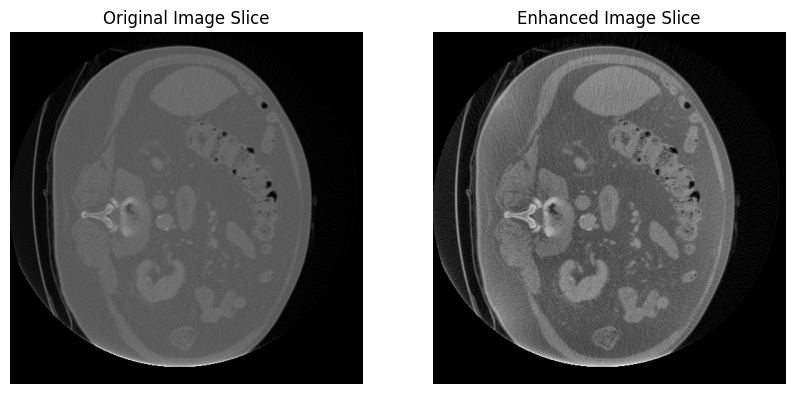

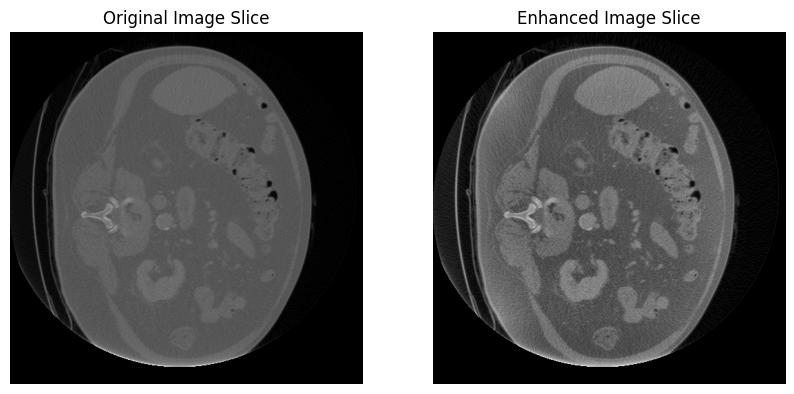

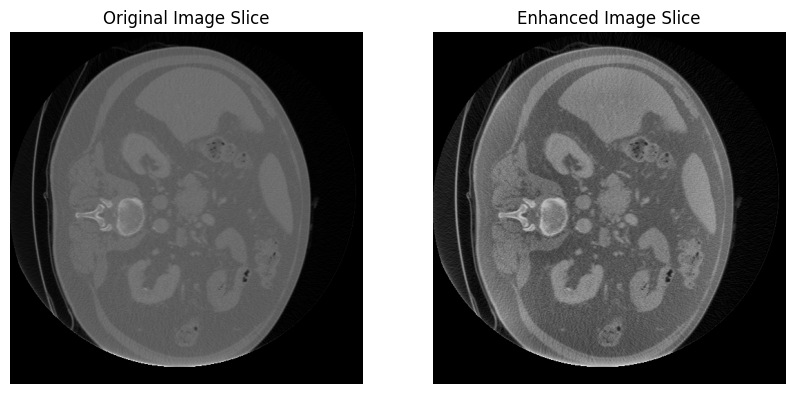

In [20]:
# Import the libraries
import matplotlib.pyplot as plt
import nibabel as nib
import skimage.exposure as exposure
from ipywidgets import interact

def preprocess_image(image, a_min=-200, a_max=200):
    adjusted_image = (image - 60 + 200) / 400
    normalized_image = (adjusted_image - np.min(adjusted_image)) / (np.max(adjusted_image) - np.min(adjusted_image))
    enhanced_image = exposure.equalize_adapthist(normalized_image)
    return enhanced_image

from IPython.display import clear_output

def plot_slice(slice_index):
    # Clear the output of the Jupyter cell
    clear_output(wait=True)

    # Load the nifti image as a numpy array
    img = 'pancreas_010_0.nii.gz'
    path_i = os.path.join(path_img, img)
    final_img = nib.load(path_i)
    nifti_image = final_img.get_fdata()

    # Get the specified slice along the third dimension
    nifti_slice = nifti_image[:, :, slice_index]

    # Create a figure with two subplots arranged in one row
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Display the original image slice in grayscale in the first subplot
    axs[0].imshow(nifti_slice, cmap='gray')
    axs[0].axis('off') # Hide axes
    axs[0].set_title('Original Image Slice')

    # Apply preprocessing to the original image slice
    enhanced_slice = preprocess_image(nifti_slice)

    # Display the enhanced image slice in grayscale in the second subplot
    axs[1].imshow(enhanced_slice, cmap='gray')
    axs[1].axis('off') # Hide axes
    axs[1].set_title('Enhanced Image Slice')

# Create an interactive slider to change the slice being displayed
interact(plot_slice, slice_index=(0, 64))